<center>
    <h1> 
        Validação dos Modelos de Classificação dos Histogramas
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>
<br>
<p>Após realizar os testes das diferentes possibilidades de criação dos modelos, elegemos duas redes neurais para avaliarmos com mais critérios e validarmos os mesmos.  </p>


<h4>Desafio #1: Classificação de documentos (RG, CNH e CPF) </h4>

 - Contextualização: Inúmeras áreas de diferentes organizações (usualmente como parte de um processo de um backoffice) recepcionam documentos dos seus clientes para formação de kits de documentação. Tais kits são, por exemplo, compartilhados com outros stakeholders das empresas. Conforme pode-se pressupor, um desafio nesse cenário refere-se ao fato de que o cliente pode enviar documentos, porém sem necessariamente indicar a qual tipo se o documento se refere (RG, CNH ou CPF, por exemplo). Dessa forma, ao invés de demandar um trabalho manual para essa leitura e classificação dos documentos, podemos construir um modelo de aprendizado que tenha capacidade de ler um conjunto de documentos (em .jpg, por exemplo) e, subsequentemente, realizar a classificação em três tipos distintos: RG, CNH e CPF.
 - Dataset: Para esse desafio utilizaremos um dataset público de RG, CNH e CPF (incluindo as imagens). Este repositório apresenta o conjunto de dados denominado Brazilian Identity Document Dataset (BID Dataset), o primeiro conjunto de dados público de documentos de identificação brasileiros. <br>
Link do dataset: https://github.com/ricardobnjunior/Brazilian-Identity-Document-Dataset

<h4>Roteiro</h4>
Módulos utilizados <br>
1. Preparando os dados <br>
2. Validação RGB + 100 HSV <br>
3. Validação 100 Valores do HSV  <br>
4. Conclusão 

##### Módulos utilizados

In [1]:
import keras.backend as K
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import json
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from keras.layers import BatchNormalization

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [42]:
# Função para auxiliar nos plots dos registros de acurácia e loss
def loss_acc_plot(hist, metric, epochs):
    plt.figure(figsize=(12, 7))
    epochs_range = range(1, epochs + 1)
    train_data_vl = hist.history[metric]
    validation_data_vl = hist.history['val_' + metric]
    plt.plot(epochs_range,  train_data_vl, '-o',label='Train Data')
    plt.plot(epochs_range, validation_data_vl, '-o', label='Validation Data')
    plt.legend()
    plt.xticks(range(0, epochs + 1, 5))

    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.title(f'Training {metric}', fontsize=20)

# 1. Preparando os dados

In [3]:
# Abrindo o conjunto de dados
with open('imagens_originais/desafio1_data.json') as file: 
    data2 = json.load(file)

In [102]:
X_op2 = deepcopy(data['op2'])

In [103]:
y_3 = deepcopy(data2['y3'])

In [104]:
labels = {}
for i,j in zip(np.unique(y_3), range(len(np.unique(y_3)))):
    labels[i] = j

In [105]:
labels

{'CNH': 0, 'CPF': 1, 'RG': 2}

In [106]:
for i in range(len(y_3)):
    y_3[i] = labels[y_3[i]]

In [107]:
y_3 = to_categorical(y_3,len(np.unique(y_3)))

In [108]:
X_train, X_val, y_train, y_val = train_test_split(X_op2, y_3, test_size=0.2)

In [109]:
X__train, X_test, y__train, y_test = train_test_split(X_train, y_train, test_size=0.2)

# 2. Validação RGB + 100 HSV

In [110]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(np.array(X_op2)[0].shape)))
model.add(BatchNormalization())
model.add(Dropout(.25))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=['categorical_accuracy'])

In [111]:
history = model.fit(np.array(X__train), np.array(y__train), validation_data=[np.array(X_test), np.array(y_test)], epochs=20, batch_size=32, verbose=1)

Epoch 1/20
576/576 [==============================] - 13s 5ms/step - loss: 0.2517 - categorical_accuracy: 0.9177 - val_loss: 0.1519 - val_categorical_accuracy: 0.9544
Epoch 2/20
576/576 [==============================] - 1s 1ms/step - loss: 0.1472 - categorical_accuracy: 0.9537 - val_loss: 0.1209 - val_categorical_accuracy: 0.9638
Epoch 3/20
576/576 [==============================] - 1s 1ms/step - loss: 0.1289 - categorical_accuracy: 0.9579 - val_loss: 0.0977 - val_categorical_accuracy: 0.9701
Epoch 4/20
576/576 [==============================] - 1s 1ms/step - loss: 0.1165 - categorical_accuracy: 0.9627 - val_loss: 0.0883 - val_categorical_accuracy: 0.9744
Epoch 5/20
576/576 [==============================] - 1s 1ms/step - loss: 0.1145 - categorical_accuracy: 0.9644 - val_loss: 0.0946 - val_categorical_accuracy: 0.9724
Epoch 6/20
576/576 [==============================] - 1s 1ms/step - loss: 0.1086 - categorical_accuracy: 0.9650 - val_loss: 0.0863 - val_categorical_accuracy: 0.9735
Epo

In [132]:
y_pred = model.predict(X_val)
y_pred = [ np.argmax(y) for y in y_pred]
y_pred = to_categorical(y_pred,len(np.unique(y_pred)))

In [138]:
print(classification_report(y_pred, y_val, target_names=['CNH', 'CPF', 'RG']))

              precision    recall  f1-score   support

         CNH       0.98      0.97      0.98      2149
         CPF       0.99      0.97      0.98      1513
          RG       0.97      0.99      0.98      2098

   micro avg       0.98      0.98      0.98      5760
   macro avg       0.98      0.98      0.98      5760
weighted avg       0.98      0.98      0.98      5760
 samples avg       0.98      0.98      0.98      5760



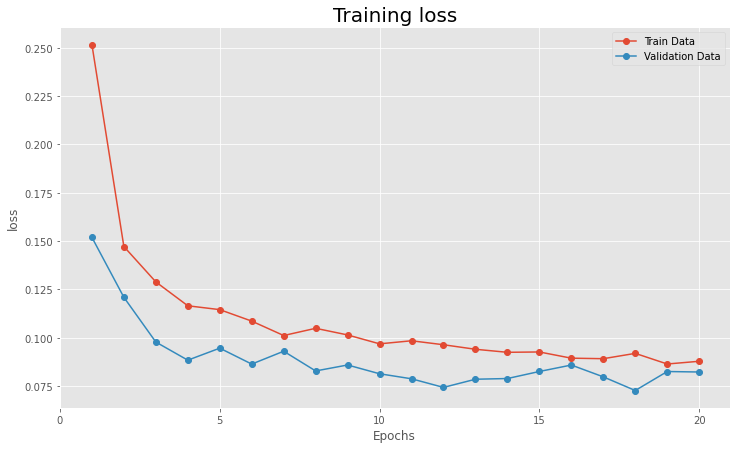

In [139]:
loss_acc_plot(history, 'loss', epochs=20)

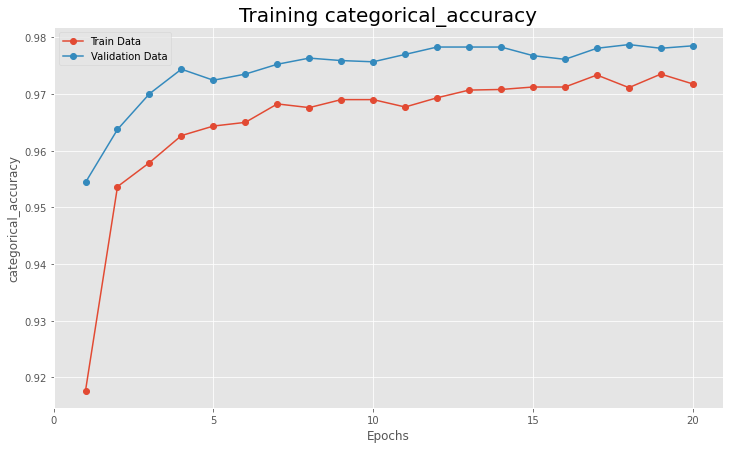

In [143]:
loss_acc_plot(history,'categorical_accuracy', epochs=20)

In [172]:
y_pred_label = []
for i in range(len(y_pred)):
    if y_pred[i][0] == 1.0:
        y_pred_label.append('CNH')
    elif y_pred[i][1] == 1.0:
        y_pred_label.append('CPF')
    elif y_pred[i][2] == 1.0:
        y_pred_label.append('RG')

In [173]:
y_val_label = []
for i in range(len(y_val)):
    if y_val[i][0] == 1.0:
        y_val_label.append('CNH')
    elif y_val[i][1] == 1.0:
        y_val_label.append('CPF')
    elif y_val[i][2] == 1.0:
        y_val_label.append('RG')

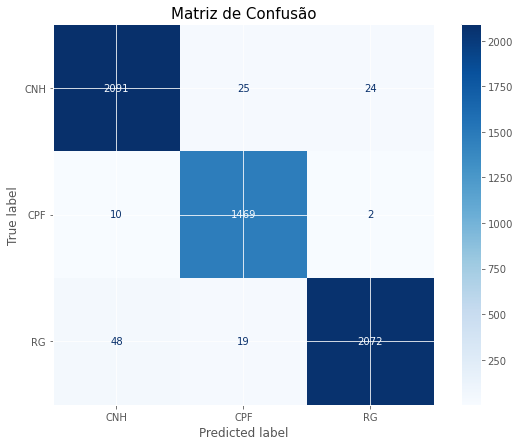

In [181]:
cm = confusion_matrix(y_val_label, y_pred_label, labels=['CNH', 'CPF', 'RG'])
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('Matriz de Confusão', fontsize=15)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CNH', 'CPF', 'RG']).plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

# 3. Validação 100 Valores do HSV

In [191]:
X_op2_mod3 = []
for i in range(len(X_op2)):
    X_op2_mod3.append(X_op2[i][-100:])

In [192]:
X_train, X_val, y_train, y_val = train_test_split(X_op2_mod3, y_3, test_size=0.2)

In [193]:
X__train, X_test, y__train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [194]:
X_op2_mod3 = np.array(X_op2_mod3)

In [214]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_op2_mod3[0].shape)))
model.add(BatchNormalization())
model.add(Dropout(.25))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                2020      
                                                                 
 batch_normalization_10 (Bat  (None, 20)               80        
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                                 
 dense_25 (Dense)            (None, 3)                 63        
                                                                 
Total params: 2,163
Trainable params: 2,123
Non-trainable params: 40
_________________________________________________________________


In [215]:
history = model.fit(np.array(X__train), np.array(y__train), validation_data=[np.array(X_test), np.array(y_test)], epochs=20, batch_size=32, verbose=1)

Epoch 1/20
576/576 [==============================] - 2s 1ms/step - loss: 0.2961 - categorical_accuracy: 0.9041 - val_loss: 0.1422 - val_categorical_accuracy: 0.9599
Epoch 2/20
576/576 [==============================] - 0s 832us/step - loss: 0.1772 - categorical_accuracy: 0.9443 - val_loss: 0.1108 - val_categorical_accuracy: 0.9638
Epoch 3/20
576/576 [==============================] - 1s 933us/step - loss: 0.1651 - categorical_accuracy: 0.9489 - val_loss: 0.1110 - val_categorical_accuracy: 0.9640
Epoch 4/20
576/576 [==============================] - 1s 1ms/step - loss: 0.1580 - categorical_accuracy: 0.9518 - val_loss: 0.0954 - val_categorical_accuracy: 0.9685
Epoch 5/20
576/576 [==============================] - 1s 925us/step - loss: 0.1484 - categorical_accuracy: 0.9524 - val_loss: 0.0875 - val_categorical_accuracy: 0.9724
Epoch 6/20
576/576 [==============================] - 0s 819us/step - loss: 0.1472 - categorical_accuracy: 0.9538 - val_loss: 0.0908 - val_categorical_accuracy: 0.9

In [216]:
y_pred = model.predict(X_val)
y_pred = [ np.argmax(y) for y in y_pred]
y_pred = to_categorical(y_pred,len(np.unique(y_pred)))

In [217]:
print(classification_report(y_pred, y_val, target_names=['CNH', 'CPF', 'RG']))

              precision    recall  f1-score   support

         CNH       0.98      0.96      0.97      2241
         CPF       0.97      0.99      0.98      1380
          RG       0.96      0.97      0.97      2139

   micro avg       0.97      0.97      0.97      5760
   macro avg       0.97      0.97      0.97      5760
weighted avg       0.97      0.97      0.97      5760
 samples avg       0.97      0.97      0.97      5760



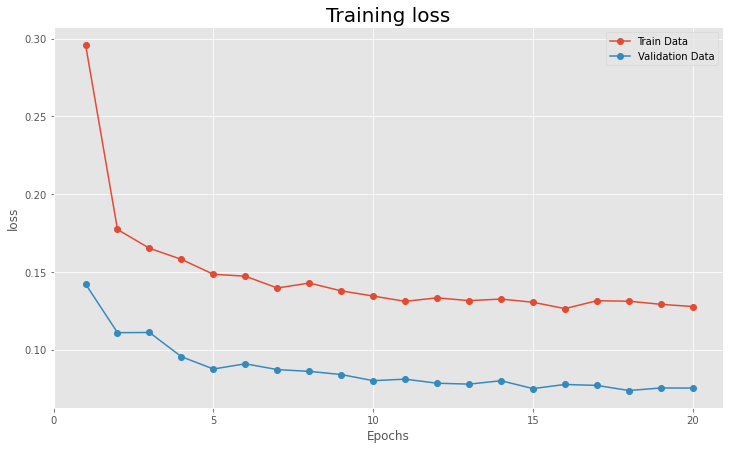

In [218]:
loss_acc_plot(history, 'loss', epochs=20)

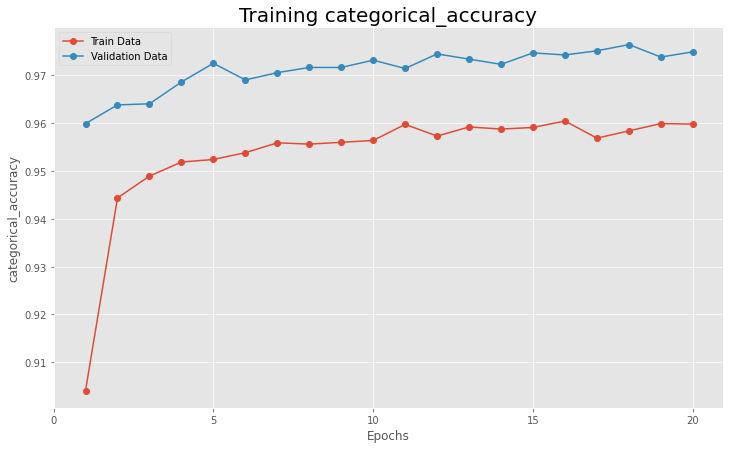

In [219]:
loss_acc_plot(history,'categorical_accuracy', epochs=20)

In [220]:
y_pred_label = []
for i in range(len(y_pred)):
    if y_pred[i][0] == 1.0:
        y_pred_label.append('CNH')
    elif y_pred[i][1] == 1.0:
        y_pred_label.append('CPF')
    elif y_pred[i][2] == 1.0:
        y_pred_label.append('RG')

In [221]:
y_val_label = []
for i in range(len(y_val)):
    if y_val[i][0] == 1.0:
        y_val_label.append('CNH')
    elif y_val[i][1] == 1.0:
        y_val_label.append('CPF')
    elif y_val[i][2] == 1.0:
        y_val_label.append('RG')

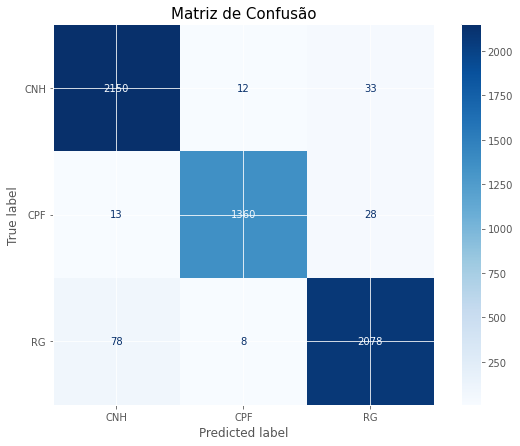

In [222]:
cm = confusion_matrix(y_val_label, y_pred_label, labels=['CNH', 'CPF', 'RG'])
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('Matriz de Confusão', fontsize=15)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CNH', 'CPF', 'RG']).plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

# 4. Conclusão